<a href="https://colab.research.google.com/github/Light896cart/CV/blob/main/loss/loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt


In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
# Загрузка тренировочного набора данных
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Задаем размер валидационного набора
validation_size = 10000
train_size = len(train_dataset) - validation_size

# Разделение на тренировочный и валидационный наборы
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

# Создание загрузчиков данных (DataLoader)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.84MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.42MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.conv1 = nn.Conv2d(1,16,2)
    self.conv2 = nn.Conv2d(16,64,2)
    self.flat = nn.Flatten()
    self.liner = nn.Linear(43264,10)

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.flat(x)
    x = self.liner(x)
    # self.len_conv = x.shape[1]
    # print(self.len_conv)
    # x = self.liner(x)
    return x

In [6]:
class CustomLoss:
    def __init__(self, loss_fn):
        self.loss_fn = loss_fn

    def __call__(self, *args, **kwargs):
        # Вычисляем значение потерь
        loss_value = self.loss_fn(*args, **kwargs)
        # Возвращаем только значение потерь, если оно не изначально в том же формате
        return loss_value

In [7]:
model = Model()
print(model)
loss_functions = [
    nn.CrossEntropyLoss(), # обычно работает с one-hot метками или просто с метками, для предсказание многоклассовой классификации, по скорости быстр, по точности точен когда классы сбалансированы, иначе все плохо
    nn.L1Loss(), # по сути тоже самое что и кросс энтропия, но дополнительно имеется коэф фокуса, который помогает при дисбалансе классов, по скрости чуть помедленее своего аналога, про точность уже сказал
    nn.MSELoss(), # для задач ригрессии, метки просто числовые значения, скорость зависит от размера данных, но в целом быстрая, по точности...ну это просто квадрат среднего, вроде все очевидно, будет страдать от выбросов
    nn.BCELoss(), # для бинарной классификации, работает с метками в диапазоне [0,1] (вероятности), скорость быстрая, точность очень высокая, но может быть чувствительной к дисбалансу
    nn.CTCLoss(), # для последовательных данных ,  использует последовательные метки и временные шаги, скорость может быть медленной, эффективна в
    nn.NLLLoss(), # преобразует логиты в вероятности, по скорости норм, по точности тоже
    nn.PoissonNLLLoss(), # используется для предсказаний числа событий, которые происходят в фиксированном интервале (времени, пространства и т.д.), метки целочисленные значения, скорость быстрая, точность хорошая
    nn.GaussianNLLLoss(), # для регрессии, метки непрерывные, быстрая если данные оптимизированы по нормальному распределению, точность хорошая даже при шуме, но при выбросах может страдать
    nn.BCEWithLogitsLoss(), # для бинариклассификации, скорость быстрая
    nn.MarginRankingLoss(), # для задач ранжирования или парное сравнение, работает с парой значений, скорость быстрая, точность вайбик
    nn.HingeEmbeddingLoss(), # для бинарной классификации, работает по принципу SVM (метод опорных векторов), метки в виде -1,1 где -1 один класс, 1 другой, скорость быстрая т.к минимальные вычисления, по точности могу сказать, что в общем то очень качественный, главное чтобы шума не было
    nn.MultiLabelMarginLoss(), # Для многометочных задач, где каждый объект может принадлежать более чем одному классу, может быть медленным, но как бы и так очевидно, по точности тоже может страдать, ну так как по сути то и задача трудноватая (ну в общем то используем что имеем)
    nn.HuberLoss(), # уменьшаем чуствительность к выбросам в задачах регрессии, скорость быстрая, по точности очень не плоха, так как мы как бы балансируем между L1 и L2 потерями
    nn.SmoothL1Loss(), # задачи регрессии где нужна устойчивость к выбросам, скорость быстрая, точность тоже
    nn.SoftMarginLoss(), # бинарная классификация, с вероятностями для каждого класса
]

optimezer = optim.Adam(model.parameters(),lr=0.001)
# Создание планировщика изменения learning rate
scheduler = optim.lr_scheduler.StepLR(optimezer, step_size=1, gamma=0.1)

Model(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(2, 2), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (liner): Linear(in_features=43264, out_features=10, bias=True)
)


In [10]:
for _ in range(50):
  for img,label in train_loader:
    optimezer.zero_grad()
    output = model(img)
    loss = loss_functions[0](output,label)
    loss.backward()
    optimezer.step()

  print(loss.item())
  # Шаг изменения learning rate после каждой эпохи
  scheduler.step()

0.5356679558753967
0.08261290192604065
0.3424460291862488
0.02218451537191868
0.19985227286815643
0.4374919533729553
0.07608864456415176
0.4483395516872406
0.0833156481385231
0.18904350697994232
0.12320371717214584
0.12794817984104156
0.3660920262336731
0.07345550507307053
0.43335944414138794
0.09994571655988693
0.11497507244348526
0.12099219113588333
0.12920840084552765
0.05294334143400192
0.06413891166448593
0.2685222923755646
0.10837485641241074
0.05615267902612686
0.05351794511079788
0.18660485744476318
0.13310185074806213
0.030407583341002464
0.07983599603176117
0.055437393486499786
0.27716436982154846
0.03711533546447754
0.24101921916007996
0.2309560626745224
0.12677393853664398
0.32469895482063293
0.09948055446147919
0.20614561438560486
1.0267001390457153
0.03776263818144798
0.2996279299259186
0.21179461479187012
0.06814678013324738
0.1578245609998703
0.14189037680625916
0.23411627113819122
0.17577873170375824
0.41047433018684387
1.0393054485321045
0.3708900809288025


In [ ]:
def evaluate_model(model, data_loader):
    model.eval()  # Устанавливаем модель в режим оценки
    correct = 0
    total = 0

    with torch.no_grad():  # Отключаем автоматическое вычисление градиентов
        for img, label in data_loader:
            output = model(img)  # Получаем выход модели
            _, predicted = torch.max(output.data, 1)  # Получаем предсказанные классы
            total += label.size(0)  # Обновляем общее количество примеров
            correct += (predicted == label).sum().item()  # Подсчитываем количество правильных предсказаний

    accuracy = correct / total  # Вычисляем точность
    return accuracy

Ошибка: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])) is deprecated. Please ensure they have the same size.. Прекращение обучения с текущей функцией потерь: BCELoss()
-78257232.0
BCELoss() , 0.1125
1736.5
CrossEntropyLoss() , 0.8366
Ошибка: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: L1Loss()
1736.5


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


L1Loss() , 0.8366
Ошибка: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: MSELoss()
1736.5


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSELoss() , 0.8366
Ошибка: CTCLoss.forward() missing 2 required positional arguments: 'input_lengths' and 'target_lengths'. Прекращение обучения с текущей функцией потерь: CTCLoss()
1736.5
CTCLoss() , 0.8366
-332231040.0
NLLLoss() , 0.1263
Ошибка: The size of tensor a (64) must match the size of tensor b (10) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: PoissonNLLLoss()
-332231040.0
PoissonNLLLoss() , 0.1263
Ошибка: GaussianNLLLoss.forward() missing 1 required positional argument: 'var'. Прекращение обучения с текущей функцией потерь: GaussianNLLLoss()
-332231040.0
GaussianNLLLoss() , 0.1263
Ошибка: kl_div: Integral inputs not supported.. Прекращение обучения с текущей функцией потерь: KLDivLoss()
-332231040.0


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3369: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


KLDivLoss() , 0.1263
Ошибка: Target size (torch.Size([64])) must be the same as input size (torch.Size([64, 10])). Прекращение обучения с текущей функцией потерь: BCEWithLogitsLoss()
-332231040.0
BCEWithLogitsLoss() , 0.1263
Ошибка: MarginRankingLoss.forward() missing 1 required positional argument: 'target'. Прекращение обучения с текущей функцией потерь: MarginRankingLoss()
-332231040.0
MarginRankingLoss() , 0.1263
Ошибка: The size of tensor a (64) must match the size of tensor b (10) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: HingeEmbeddingLoss()
-332231040.0
HingeEmbeddingLoss() , 0.1263
Ошибка: inconsistent target size: [64] for input of size: [64, 10]. Прекращение обучения с текущей функцией потерь: MultiLabelMarginLoss()
-332231040.0
MultiLabelMarginLoss() , 0.1263
Ошибка: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: HuberLoss()
-332231040.0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


HuberLoss() , 0.1263
Ошибка: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: SmoothL1Loss()
-332231040.0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:1040: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


SmoothL1Loss() , 0.1263
Ошибка: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: SoftMarginLoss()
-332231040.0
SoftMarginLoss() , 0.1263
Ошибка: The size of tensor a (64) must match the size of tensor b (10) at non-singleton dimension 1. Прекращение обучения с текущей функцией потерь: MultiLabelSoftMarginLoss()
-332231040.0
MultiLabelSoftMarginLoss() , 0.1263


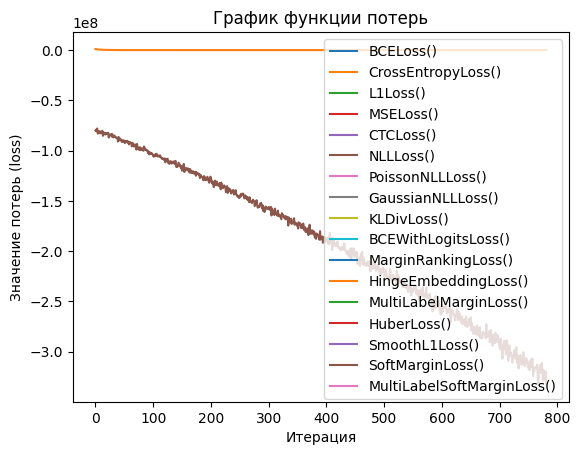

In [ ]:
results = {}

for criterion in loss_functions:
    optimezer.zero_grad()
    spisok = []
    for img, label in train_loader:
        optimezer.zero_grad()
        try:
            output = model(img)
            loss = criterion(output, label)
            loss.backward()
            optimezer.step()
        except (TypeError, RuntimeError, ValueError) as e:
            print(f"Ошибка: {e}. Прекращение обучения с текущей функцией потерь: {criterion}")
            break
        spisok.append(loss.item())  # Исправлено: добавление значения loss
    print(loss.item())
    # Построение графика после каждой функции потерь
    plt.plot(spisok, label=str(criterion))

    # Оценка на валидационном наборе
    val_accuracy = evaluate_model(model, validation_loader)  # Ваша функция оценки
    print(f'{str(criterion)} , {val_accuracy}')
    results[str(criterion)] = val_accuracy

plt.xlabel('Итерация')
plt.ylabel('Значение потерь (loss)')
plt.title('График функции потерь')
plt.legend()
plt.show()  # Показывает все графики после завершения обучения